In [49]:
#Afiya Abbasi 
#ms23ms303003
# bba (ba)

In [51]:
pip install kagglehub


In [52]:
import kagglehub

# Download the dataset
path = kagglehub.dataset_download("sulianova/cardiovascular-disease-dataset")

print("Path to dataset files:", path)



Path to dataset files: C:\Users\Afiya\.cache\kagglehub\datasets\sulianova\cardiovascular-disease-dataset\versions\1


In [53]:
import pandas as pd

# Update path with actual file name after download
file_path = f"{path}/cardio_train.csv"  # Usually this is the file name
data = pd.read_csv(file_path, sep=';')  # This dataset uses ';' as separator

print(data.shape)
data.head()


(70000, 13)


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [54]:
# Check basic info
data.info()

# Check for missing values
print("Missing values per column:\n", data.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB
Missing values per column:
 id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco        

In [55]:
# Drop ID column
data.drop('id', axis=1, inplace=True)


In [56]:
# Convert age from days to years
data['age_years'] = (data['age'] / 365).astype(int)

# Calculate BMI
data['bmi'] = data['weight'] / ((data['height'] / 100) ** 2)

# Drop the original 'age' column to avoid confusion
data.drop('age', axis=1, inplace=True)

data.head()


,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi
0,2,168,62.0,110,80,1,1,0,0,1,0,50,21.967120
1,1,156,85.0,140,90,3,1,0,0,1,1,55,34.927679
2,1,165,64.0,130,70,3,1,0,0,0,1,51,23.507805
3,2,169,82.0,150,100,1,1,0,0,1,1,48,28.710479
4,1,156,56.0,100,60,1,1,0,0,0,0,47,23.011177


In [57]:
# Optional: Convert cholesterol levels to readable labels
data['cholesterol'] = data['cholesterol'].map({1: 'normal', 2: 'above normal', 3: 'well above normal'})


In [58]:
# Check datatypes
data.dtypes


gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol     object
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
age_years        int32
bmi            float64
dtype: object

In [59]:
# Convert to category if needed
data['cardio'] = data['cardio'].astype('category')


In [60]:
# Check target distribution (0 = no disease, 1 = heart disease)
data['cardio'].value_counts(normalize=True)


cardio
0    0.5003
1    0.4997
Name: proportion, dtype: float64

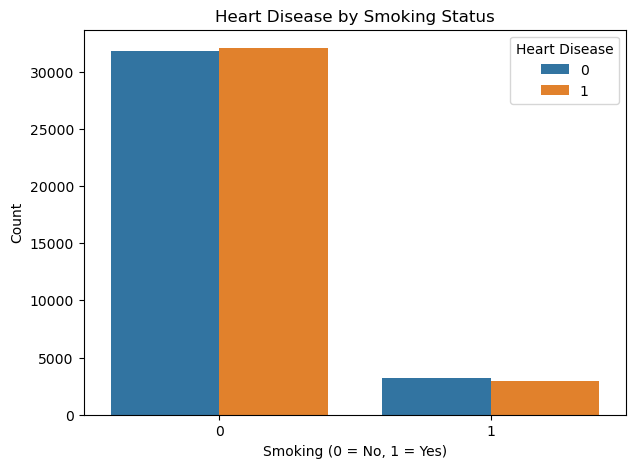

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

# Bar plot to show the number of smokers with and without heart disease
plt.figure(figsize=(7,5))
sns.countplot(data=data, x='smoke', hue='cardio')
plt.title('Heart Disease by Smoking Status')
plt.xlabel('Smoking (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.legend(title='Heart Disease')
plt.show()

# Helps visualize if smokers are more likely to have heart disease.


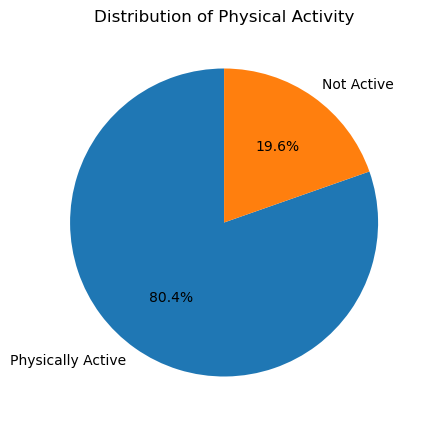

In [62]:
# Pie chart showing how many people are physically active
activity_counts = data['active'].value_counts()
labels = ['Physically Active', 'Not Active']

plt.figure(figsize=(5,5))
plt.pie(activity_counts, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Physical Activity')
plt.show()


# Shows overall physical activity in population.


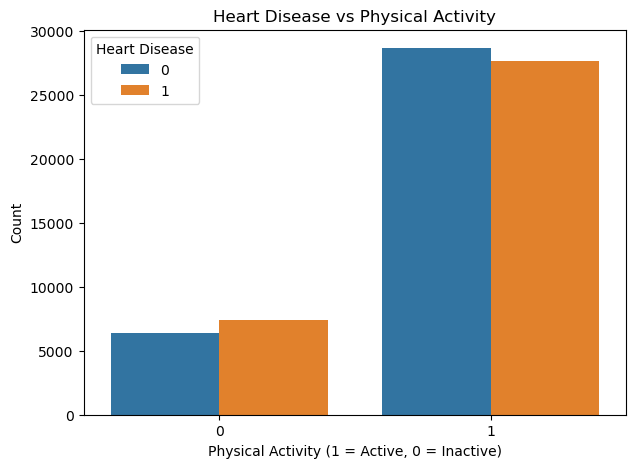

In [63]:
# Grouped bar chart to compare physical activity with heart disease
plt.figure(figsize=(7,5))
sns.countplot(data=data, x='active', hue='cardio')
plt.title('Heart Disease vs Physical Activity')
plt.xlabel('Physical Activity (1 = Active, 0 = Inactive)')
plt.ylabel('Count')
plt.legend(title='Heart Disease')
plt.show()


# Indicates whether active individuals are less prone to heart disease.


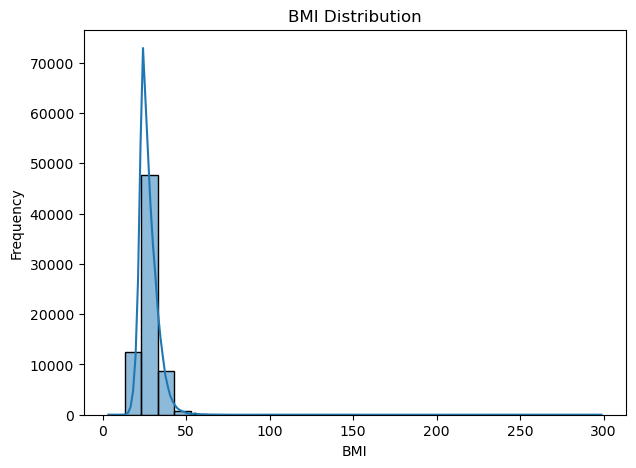

In [65]:
# Histogram showing BMI distribution
plt.figure(figsize=(7,5))
sns.histplot(data=data, x='bmi', bins=30, kde=True)
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()


# Helps check if higher BMI is common among heart disease patients.


In [66]:


# Used if you have mental or physical health day columns.


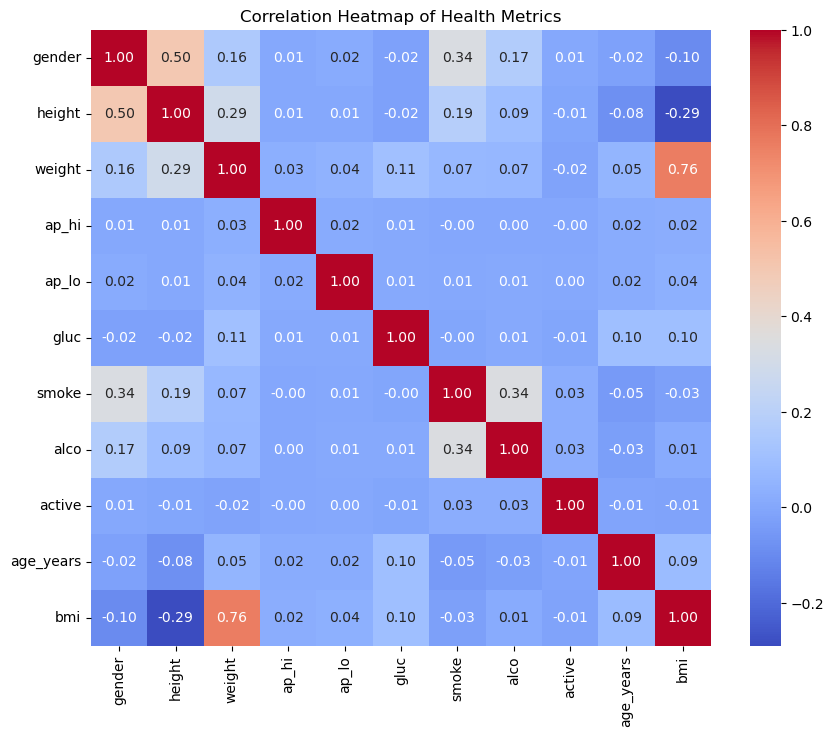

In [80]:
# Plot correlation heatmap with only numeric columns
plt.figure(figsize=(10, 8))
sns.heatmap(data.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Health Metrics')
plt.show()



# Reveals relationships between variables like BMI, age, and blood pressure.


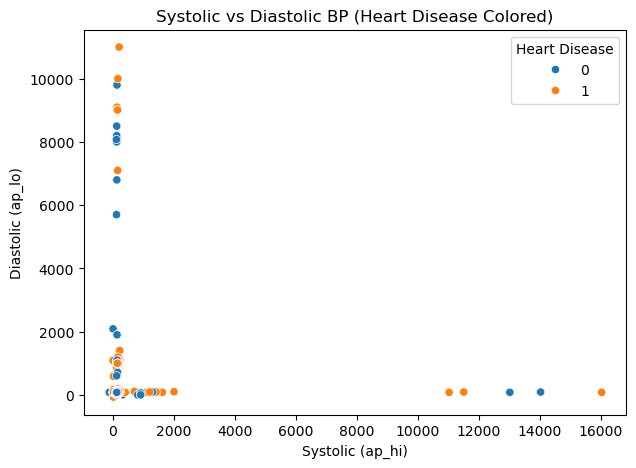

In [78]:
# Scatter plot between systolic and diastolic blood pressure
plt.figure(figsize=(7,5))
sns.scatterplot(x='ap_hi', y='ap_lo', hue='cardio', data=data)
plt.title('Systolic vs Diastolic BP (Heart Disease Colored)')
plt.xlabel('Systolic (ap_hi)')
plt.ylabel('Diastolic (ap_lo)')
plt.legend(title='Heart Disease')
plt.show()


# Explores if abnormal BP ranges are related to heart disease.


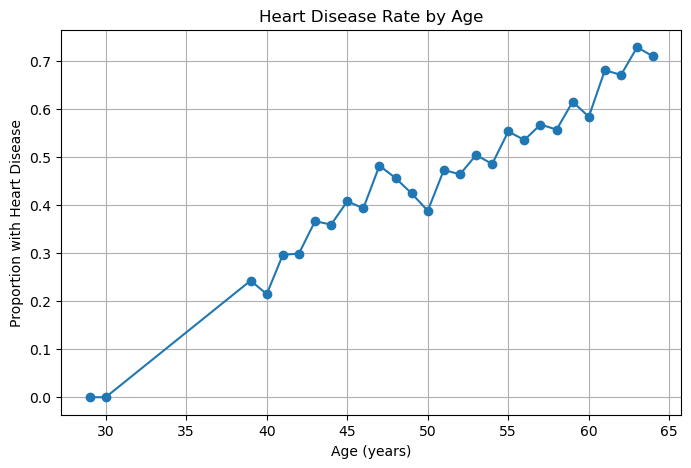

In [84]:
# Convert 'cardio' to numeric temporarily
age_group = data.groupby('age_years')['cardio'].apply(lambda x: x.astype(int).mean())

plt.figure(figsize=(8, 5))
age_group.plot(kind='line', marker='o')
plt.title('Heart Disease Rate by Age')
plt.xlabel('Age (years)')
plt.ylabel('Proportion with Heart Disease')
plt.grid(True)
plt.show()


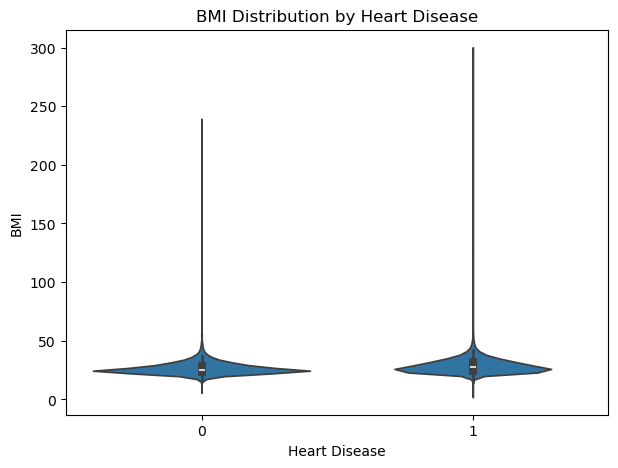

In [86]:
plt.figure(figsize=(7,5))
sns.violinplot(data=data, x='cardio', y='bmi')
plt.title('BMI Distribution by Heart Disease')
plt.xlabel('Heart Disease')
plt.ylabel('BMI')
plt.show()


# Combines box plot and density to show BMI distribution patterns.


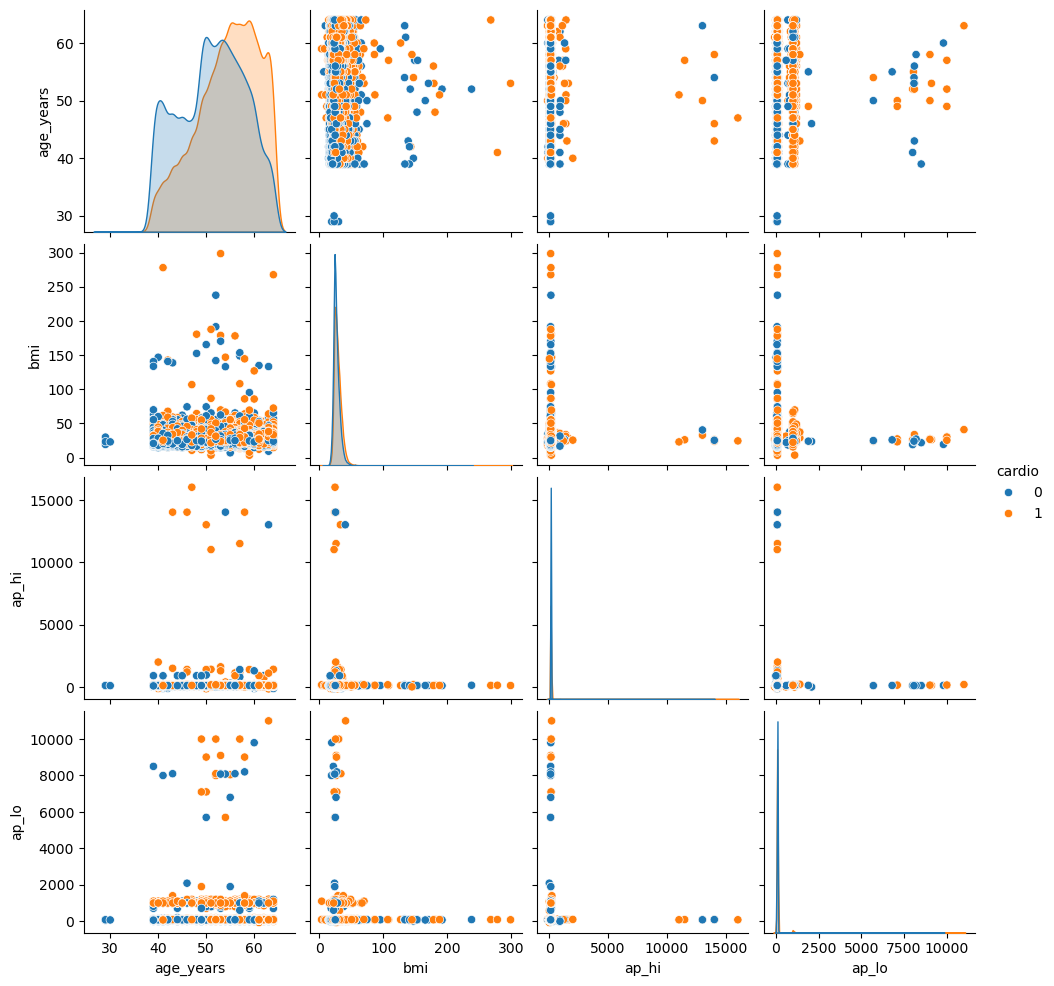

In [89]:
# Due to size, limit to a few features for performance
sns.pairplot(data[['age_years', 'bmi', 'ap_hi', 'ap_lo', 'cardio']], hue='cardio')
plt.show()


# Shows all pairwise combinations of key variables with color-coded outcomes.


In [ ]:
ce heart disease risk.
